   Sr No  Year  No of Accidents  Derailments  Collisions  Collisions at LC  \
0      1  2016               24           10           4                 9   
1      2  2017                5            4           1                 0   
2      3  2018               11            8           0                 3   
3      4  2019               18            8           2                 8   
4      5  2020                8            3           1                 4   

   Fire Accidents  Overshooting   
0               0              1  
1               0              0  
2               0              0  
3               0              0  
4               0              0  
Sr No               0
Year                0
No of Accidents     0
Derailments         0
Collisions          0
Collisions at LC    0
Fire Accidents      0
Overshooting        0
dtype: int64
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No of Accidents   No. Observati

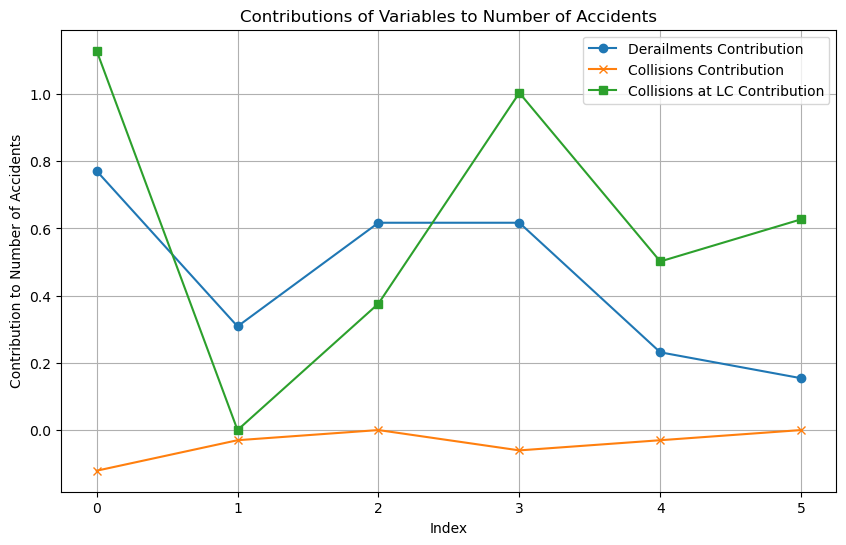

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Rawalpindi.xlsx'
sheet_name = 'accident types'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Inspect the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data cleaning (if necessary)
# For example, fill missing values
df = df.fillna(method='ffill')

# Define the dependent (response) and independent (predictor) variables
X = df[['Derailments', 'Collisions', 'Collisions at LC']]
y = df['No of Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Specify the GLM with a Poisson distribution and log link function
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_results = glm_poisson.fit()
summary = glm_poisson_results.summary()
print(summary)

# Deviance and AIC are directly available
print(f"Deviance: {glm_poisson_results.deviance}")
print(f"AIC: {glm_poisson_results.aic}")

# Calculate pseudo R-squared (McFadden's)
null_deviance = glm_poisson_results.null_deviance
pseudo_r_squared = 1 - (glm_poisson_results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")



# Plotting contributions of each variable
plt.figure(figsize=(10, 6))

# Derailments
plt.plot(df.index, df['Derailments'] * glm_poisson_results.params['Derailments'], label='Derailments Contribution', marker='o')

# Collisions
plt.plot(df.index, df['Collisions'] * glm_poisson_results.params['Collisions'], label='Collisions Contribution', marker='x')

# Collisions at LC
plt.plot(df.index, df['Collisions at LC'] * glm_poisson_results.params['Collisions at LC'], label='Collisions at LC Contribution', marker='s')

plt.xlabel('Index')
plt.ylabel('Contribution to Number of Accidents')
plt.title('Contributions of Variables to Number of Accidents')
plt.legend()
plt.grid(True)
plt.savefig('contributions_to_accidents.png')
plt.show()


   Year  No of Accidents  Accidents at Track  Accidents in Station Limits
0  2016               24                  13                           11
1  2017                5                   1                            4
2  2018               11                   3                            8
3  2019               18                  10                            8
4  2020                8                   5                            3
Year                           0
No of Accidents                0
Accidents at Track             0
Accidents in Station Limits    0
dtype: int64
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No of Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:         

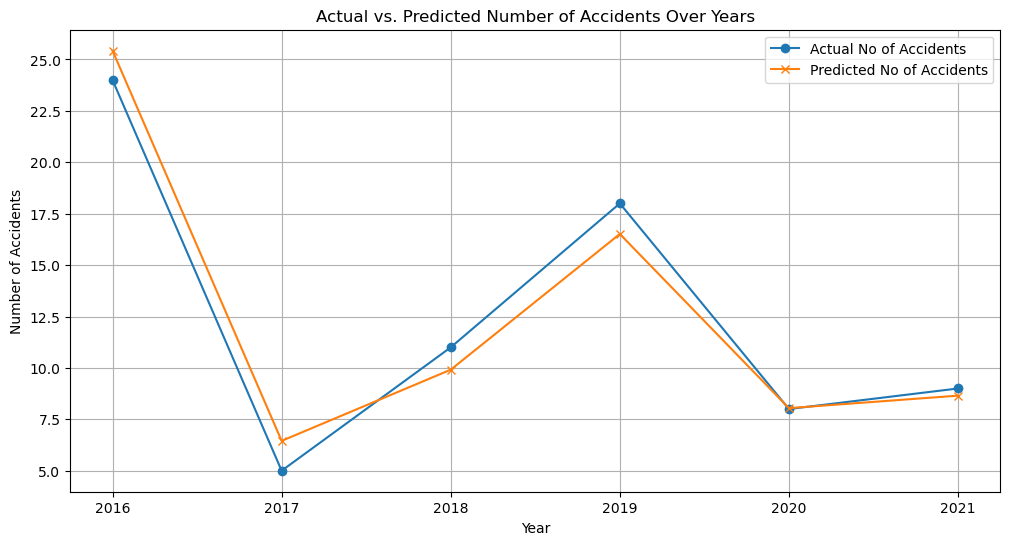

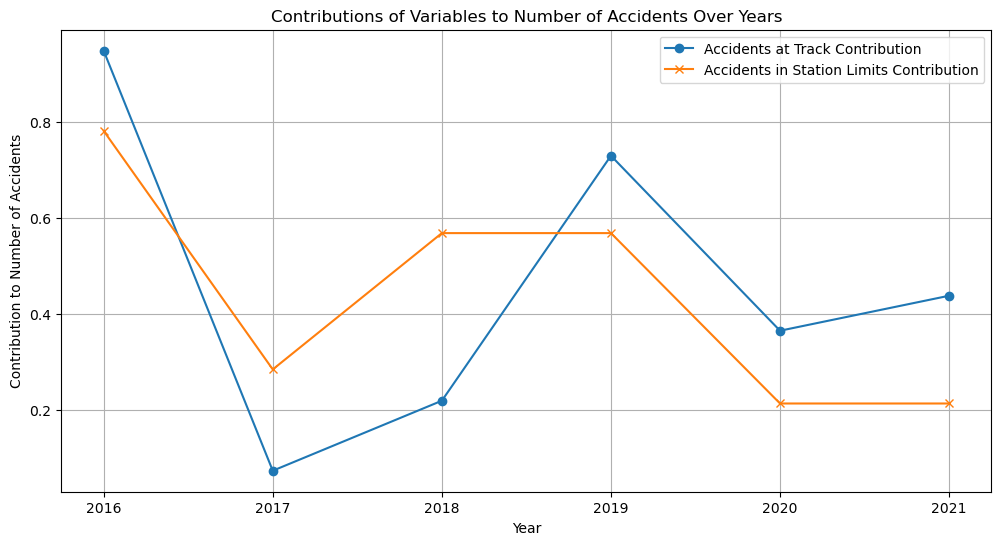

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Rawalpindi.xlsx'
sheet_name = 'Location of Accidents'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Inspect the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data cleaning (if necessary)
# For example, fill missing values
df = df.fillna(method='ffill')

# Define the dependent (response) and independent (predictor) variables
X = df[['Accidents at Track', 'Accidents in Station Limits']]
y = df['No of Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Specify the GLM with Poisson distribution and log link function
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_results = glm_poisson.fit()
summary = glm_poisson_results.summary()
print(summary)

# Deviance and AIC are directly available
print(f"Deviance: {glm_poisson_results.deviance}")
print(f"AIC: {glm_poisson_results.aic}")

# Calculate pseudo R-squared (McFadden's)
null_deviance = glm_poisson_results.null_deviance
pseudo_r_squared = 1 - (glm_poisson_results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")


# Plotting contributions of each variable
plt.figure(figsize=(12, 6))

# Accidents at Track
plt.plot(df['Year'], df['Accidents at Track'] * glm_poisson_results.params['Accidents at Track'], label='Accidents at Track Contribution', marker='o')

# Accidents in Station Limits
plt.plot(df['Year'], df['Accidents in Station Limits'] * glm_poisson_results.params['Accidents in Station Limits'], label='Accidents in Station Limits Contribution', marker='x')

plt.xlabel('Year')
plt.ylabel('Contribution to Number of Accidents')
plt.title('Contributions of Variables to Number of Accidents Over Years')
plt.legend()
plt.grid(True)
plt.savefig('contributions_to_accidents_location.png')
plt.show()


In [17]:
import pandas as pd
import statsmodels.api as sm

# Load the data
file_path = 'Rawalpindi.xlsx'
sheet_name = 'type of line'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Define the dependent (response) variable
y = df['No_of_Accidents']

# Test GLM with Main Line only
X_main_line = sm.add_constant(df[['Main_Line']])
glm_poisson_main_line = sm.GLM(y, X_main_line, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_main_line_results = glm_poisson_main_line.fit()
print("GLM Summary with Main Line Only:")
print(glm_poisson_main_line_results.summary())
print(f"Deviance: {glm_poisson_main_line_results.deviance}")
print(f"AIC: {glm_poisson_main_line_results.aic}")

# Test GLM with Branch Line only
X_branch_line = sm.add_constant(df[['Branch_Line']])
glm_poisson_branch_line = sm.GLM(y, X_branch_line, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_branch_line_results = glm_poisson_branch_line.fit()
print("GLM Summary with Branch Line Only:")
print(glm_poisson_branch_line_results.summary())
print(f"Deviance: {glm_poisson_branch_line_results.deviance}")
print(f"AIC: {glm_poisson_branch_line_results.aic}")


GLM Summary with Main Line Only:
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    4
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.614
Date:                Sun, 04 Aug 2024   Deviance:                       7.3817
Time:                        01:11:02   Pearson chi2:                     6.25
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.36

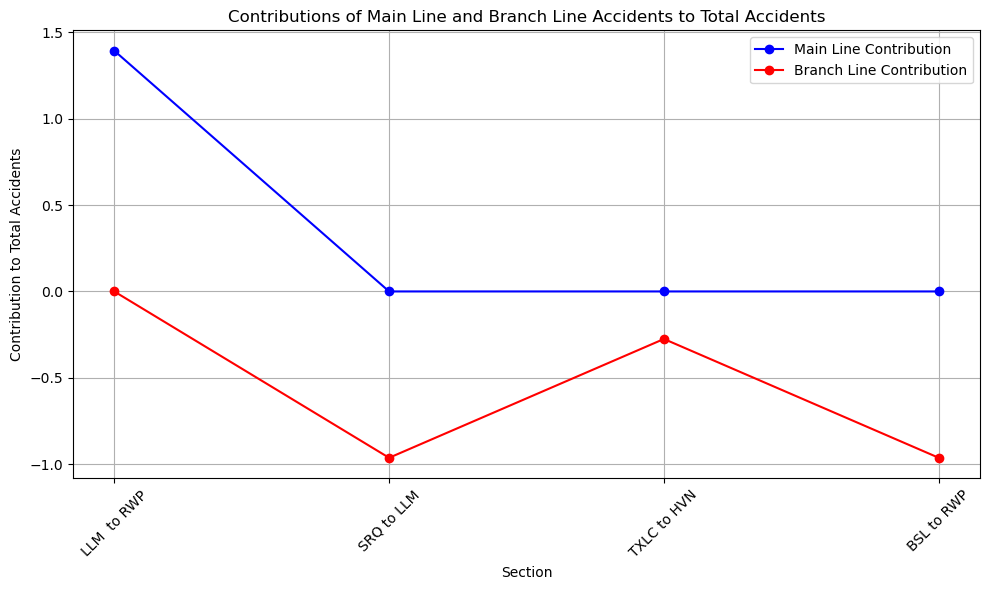

In [19]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Rawalpindi.xlsx'
sheet_name = 'type of line'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Define the dependent (response) variable
y = df['No_of_Accidents']

# Fit GLM with Main Line only
X_main_line = sm.add_constant(df[['Main_Line']])
glm_poisson_main_line = sm.GLM(y, X_main_line, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_main_line_results = glm_poisson_main_line.fit()

# Fit GLM with Branch Line only
X_branch_line = sm.add_constant(df[['Branch_Line']])
glm_poisson_branch_line = sm.GLM(y, X_branch_line, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_branch_line_results = glm_poisson_branch_line.fit()

# Calculate contributions
df['Main_Line_Contribution'] = df['Main_Line'] * glm_poisson_main_line_results.params['Main_Line']
df['Branch_Line_Contribution'] = df['Branch_Line'] * glm_poisson_branch_line_results.params['Branch_Line']

# Plotting the contributions
plt.figure(figsize=(10, 6))
plt.plot(df['Section'], df['Main_Line_Contribution'], marker='o', linestyle='-', color='b', label='Main Line Contribution')
plt.plot(df['Section'], df['Branch_Line_Contribution'], marker='o', linestyle='-', color='r', label='Branch Line Contribution')
plt.xlabel('Section')
plt.ylabel('Contribution to Total Accidents')
plt.title('Contributions of Main Line and Branch Line Accidents to Total Accidents')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('contributions_to_total_accidents.png')
plt.show()
